In [1]:
from sklearn.datasets import load_diabetes
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn import preprocessing

In [2]:
dataset = load_diabetes()

In [3]:
print(dataset.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, T-Cells (a type of white blood cells)
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, thyroid stimulating hormone
      - s5      ltg, lamotrigine
      - s6      glu, blood sugar level

Note: Each of these 10 feature va

In [4]:
X = pd.DataFrame(dataset.data, columns=dataset.feature_names)
y = pd.DataFrame(dataset.target, columns=["target"]) 

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.20) #podzial na zbior treningowy i testowy
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = 0.20) #podzial na zbior treningowy i walidacyjny

In [6]:
X_train_t = torch.FloatTensor(X_train.values)
X_test_t = torch.FloatTensor(X_test.values)
X_val_t = torch.FloatTensor(X_val.values)
y_val_t = torch.FloatTensor(y_val.values)
y_train_t = torch.FloatTensor(y_train.values)
y_test_t = torch.FloatTensor(y_test.values)

In [7]:
X

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641
...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018118,0.044485
439,0.041708,0.050680,-0.015906,0.017282,-0.037344,-0.013840,-0.024993,-0.011080,-0.046879,0.015491
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044528,-0.025930


In [8]:
y.target.describe()

count    442.000000
mean     152.133484
std       77.093005
min       25.000000
25%       87.000000
50%      140.500000
75%      211.500000
max      346.000000
Name: target, dtype: float64

(array([38., 80., 68., 62., 50., 41., 38., 42., 17.,  6.]),
 array([ 25. ,  57.1,  89.2, 121.3, 153.4, 185.5, 217.6, 249.7, 281.8,
        313.9, 346. ]),
 <BarContainer object of 10 artists>)

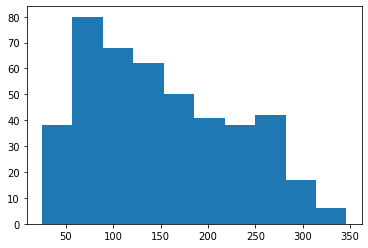

In [9]:
plt.hist(y)

<AxesSubplot:>

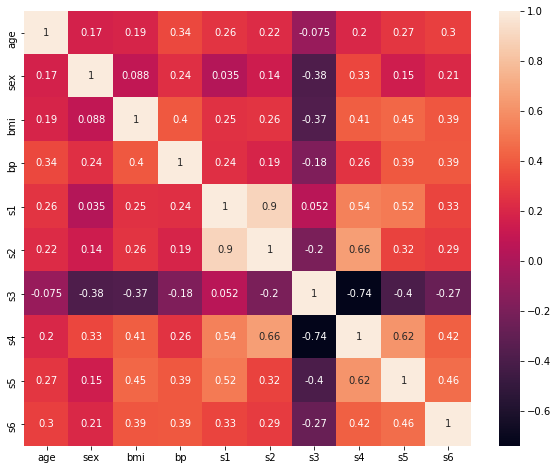

In [10]:
f, ax = plt.subplots(1, figsize=(10,8))
sns.heatmap(X.corr(), annot=True, ax=ax)

In [11]:
model = nn.Sequential(
          nn.Linear(10,15,True), #warstwa wejściowa 10 wejsc 15 wyjść
          nn.ReLU(),
          nn.Linear(15,12,True), #warstwa ukryta 15 wejsc 12 wyjsc
          nn.ReLU(),
          nn.Linear(12,8,True), #warstwa ukryta 12 wejsc 8 wyjsc
          nn.ReLU(),
          nn.Linear(8,1,True), #warstwa wyjściowa 8 wejsc 1 wyjście
          nn.ReLU()
        )

In [12]:
optimizer = torch.optim.Adam(model.parameters(), lr=0.01) #optymalizacja najpopularniejszym algorytmem Adam

In [13]:
loss_fn = torch.nn.MSELoss()  #funkcja straty -> błąd sredniokwadratowy

In [14]:
def training_loop_torch_nn(n_iters, optimizer, model, loss_fn, X_train_t, X_val_t, y_train_t, y_val_t, verbose=True):
    loss_vals = []
    val_loss_vals = []
    for iteration in range(n_iters):    
        y_train_p = model(X_train_t)                   #liczenie predykcji
        loss_train = loss_fn(y_train_p,y_train_t)      #liczenie straty na predykcji
        
        with torch.no_grad():            #to samo co wyzej dla walidacji dlatego wylaczamy autograd
            y_val_p = model(X_val_t)
            loss_val = loss_fn(y_val_p,y_val_t)
            val_loss_vals.append(loss_val.item())
        
        optimizer.zero_grad()  #zerowanie gradientów
        loss_train.backward()  #liczenie gradientów
        optimizer.step()       #aktualzacja wag
        loss_vals.append(loss_train.item())
        if verbose:
            print('Epoch %d, Training loss %f, validation loss: %f' % (iteration, loss_train.item(), loss_val.item()))
    print("===Tran and validation loss plot===")
    compare(np.linspace(1,n_iters,n_iters).astype(int), loss_vals, val_loss_vals)
            
def compare(Y, X1, X2):
    plt.plot(Y,X1)
    plt.plot(X2)
    plt.show()

Epoch 0, Training loss 30668.396484, validation loss: 27567.105469
Epoch 1, Training loss 30656.943359, validation loss: 27556.492188
Epoch 2, Training loss 30645.191406, validation loss: 27545.603516
Epoch 3, Training loss 30633.000000, validation loss: 27534.310547
Epoch 4, Training loss 30620.439453, validation loss: 27522.705078
Epoch 5, Training loss 30609.201172, validation loss: 27512.347656
Epoch 6, Training loss 30597.734375, validation loss: 27501.726562
Epoch 7, Training loss 30585.291016, validation loss: 27490.199219
Epoch 8, Training loss 30571.708984, validation loss: 27477.626953
Epoch 9, Training loss 30556.851562, validation loss: 27463.890625
Epoch 10, Training loss 30540.556641, validation loss: 27448.824219
Epoch 11, Training loss 30522.630859, validation loss: 27432.251953
Epoch 12, Training loss 30502.865234, validation loss: 27413.988281
Epoch 13, Training loss 30481.013672, validation loss: 27393.808594
Epoch 14, Training loss 30456.812500, validation loss: 273

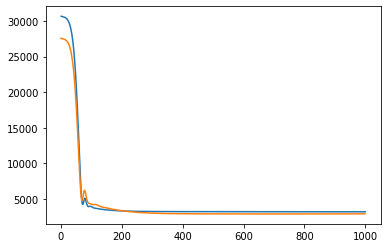

In [15]:
training_loop_torch_nn(n_iters = 1000, 
                       optimizer = optimizer,
                       model = model,
                       loss_fn = loss_fn,
                       X_train_t = X_train_t,
                       X_val_t = X_val_t,
                       y_train_t = y_train_t,
                       y_val_t = y_val_t,
                       verbose=True
                    )

In [16]:
predictions = model(X_test_t)

In [17]:
compared = y_test.copy()
compared["predicted"] = predictions.detach().numpy()
compared["loss"] = np.sqrt((compared["predicted"] - compared["target"]) ** 2)
print("RMS: %r " % np.sqrt(np.mean((compared["predicted"] - compared["target"]) ** 2)))
print("Average percent of error: %r" % np.mean(np.abs((compared["predicted"] - compared["target"]))/compared["target"]*100), "%")

RMS: 45.56649664295966 
Average percent of error: 35.76923014552437 %


In [18]:
compared

,target,predicted,loss
292,84.0,96.066437,12.066437
413,113.0,120.909851,7.909851
249,215.0,240.389679,25.389679
3,206.0,157.282608,48.717392
98,92.0,128.949554,36.949554
...,...,...,...
407,140.0,178.877869,38.877869
396,43.0,68.515358,25.515358
239,262.0,178.998688,83.001312
418,84.0,106.165588,22.165588
